# Understanding the Factors behind Heart Attack Risk in Men using SVM

In [2]:
%%time
# Importing required libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset :
df = pd.read_csv(r"C:\Users\missi\Downloads\nhis_2022.csv")

# Subsetting only Male 
df = df[df['SEX'] == 1]

# Target variable
target = 'HEARTATTEV'  # Heart Attack (1=No, 2=Yes )

# Feature variables 
features = [
    'AGE', 'HOURSWRK', 'BMICALC', 'ALCDAYSYR', 
    'MOD10DMIN', 'VIG10DMIN', 'FRUTNO', 'VEGENO', 'JUICEMNO', 
    'SALADSNO', 'BEANNO', 'SALSAMNO', 'TOMSAUCEMNO', 'SODAPNO', 
    'FRIESPNO', 'SPORDRMNO', 'FRTDRINKMNO', 'COFETEAMNO', 'POTATONO', 
    'PIZZANO', 'HRSLEEP', 'CVDSHT', 'HINOTCOVE']


df = df[df[target].isin([1, 2])]

# Special codes 
special_codes = {
    'AGE': [997, 998, 999],
    'HOURSWRK': [97, 98, 99],
    'BMICALC': [0.0, 996.0],
    'ALCDAYSYR': [995, 996, 997, 998, 999],
    'MOD10DMIN': [996, 997, 998, 999],
    'VIG10DMIN': [996, 997, 998, 999],
    'FRUTNO': [995, 996, 997, 998, 999],
    'VEGENO': [995, 996, 997, 998, 999],
    'JUICEMNO': [95, 996, 997, 998, 999],
    'SALADSNO': [95, 996, 997, 998, 999],
    'BEANNO': [996, 997, 998, 999],
    'SALSAMNO': [996, 997, 998, 999],
    'TOMSAUCEMNO': [996, 997, 998, 999],
    'SODAPNO': [996, 997, 998, 999],
    'FRIESPNO': [996, 997, 998, 999],
    'SPORDRMNO': [996, 997, 998, 999],
    'FRTDRINKMNO': [996, 997, 998, 999],
    'COFETEAMNO': [996, 997, 998, 999],
    'POTATONO': [996, 997, 998, 999],
    'PIZZANO': [996, 997, 998, 999],
    'HRSLEEP': [25, 97, 98, 99],
    'CVDSHT': [0, 7, 8, 9],
    'HINOTCOVE': [0, 7, 8, 9]
}

# Dropping special codes rows :
for col, bad_values in special_codes.items():
    initial_shape = df.shape[0]
    df = df[~df[col].isin(bad_values)]
    final_shape = df.shape[0]
    print(f"{col}: Dropped {initial_shape - final_shape} rows due to special codes.")

# Dropping missing values
df_clean = df[features + [target]].dropna()

# Encoding target : 1 -> 0 (No Heart Attack), 2 -> 1 ( Heart Attack)
df_clean[target] = df_clean[target].map({1: 0, 2: 1})

# Scaling features:
scaler = StandardScaler()
df_clean[features] = scaler.fit_transform(df_clean[features])


AGE: Dropped 21 rows due to special codes.
HOURSWRK: Dropped 38 rows due to special codes.
BMICALC: Dropped 923 rows due to special codes.
ALCDAYSYR: Dropped 1312 rows due to special codes.
MOD10DMIN: Dropped 37 rows due to special codes.
VIG10DMIN: Dropped 20 rows due to special codes.
FRUTNO: Dropped 123 rows due to special codes.
VEGENO: Dropped 35 rows due to special codes.
JUICEMNO: Dropped 13 rows due to special codes.
SALADSNO: Dropped 6 rows due to special codes.
BEANNO: Dropped 9 rows due to special codes.
SALSAMNO: Dropped 8 rows due to special codes.
TOMSAUCEMNO: Dropped 7 rows due to special codes.
SODAPNO: Dropped 5 rows due to special codes.
FRIESPNO: Dropped 3 rows due to special codes.
SPORDRMNO: Dropped 3 rows due to special codes.
FRTDRINKMNO: Dropped 4 rows due to special codes.
COFETEAMNO: Dropped 3 rows due to special codes.
POTATONO: Dropped 11 rows due to special codes.
PIZZANO: Dropped 0 rows due to special codes.
HRSLEEP: Dropped 22 rows due to special codes.
C


Best Parameters Found:
Linear SVM: {'C': 0.01}
Polynomial SVM: {'C': 0.01, 'degree': 2}
RBF SVM: {'C': 0.01, 'gamma': 'scale'}

Model Accuracies:
Linear SVM Accuracy: 0.955585464333782
Polynomial SVM Accuracy: 0.955585464333782
RBF SVM Accuracy: 0.955585464333782

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2840
           1       0.00      0.00      0.00       132

    accuracy                           0.96      2972
   macro avg       0.48      0.50      0.49      2972
weighted avg       0.91      0.96      0.93      2972


Classification Report (Polynomial SVM):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2840
           1       0.00      0.00      0.00       132

    accuracy                           0.96      2972
   macro avg       0.48      0.50      0.49      2972
weighted avg       0.91      0.96      0.93      2972


Cl

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packag

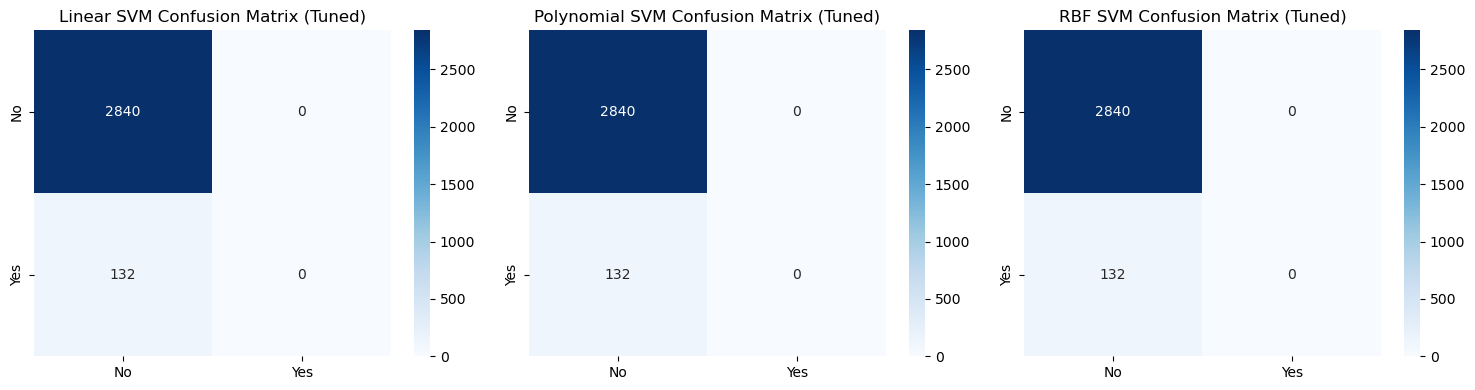


Top Features Based on Linear SVM Coefficients:
        Feature   Coefficient  AbsCoefficient
0           AGE  3.921290e-05    3.921290e-05
11     SALSAMNO -2.503738e-05    2.503738e-05
5     VIG10DMIN -2.159870e-05    2.159870e-05
13      SODAPNO  2.087243e-05    2.087243e-05
7        VEGENO -1.386474e-05    1.386474e-05
8      JUICEMNO -1.304290e-05    1.304290e-05
2       BMICALC  1.153870e-05    1.153870e-05
1      HOURSWRK  1.102851e-05    1.102851e-05
6        FRUTNO -7.337070e-06    7.337070e-06
19      PIZZANO -6.606880e-06    6.606880e-06
9      SALADSNO -6.572124e-06    6.572124e-06
3     ALCDAYSYR -5.488159e-06    5.488159e-06
20      HRSLEEP  5.199499e-06    5.199499e-06
4     MOD10DMIN  4.363845e-06    4.363845e-06
15    SPORDRMNO -4.127360e-06    4.127360e-06
22    HINOTCOVE -4.047531e-06    4.047531e-06
18     POTATONO  2.277324e-06    2.277324e-06
21       CVDSHT -1.878652e-06    1.878652e-06
12  TOMSAUCEMNO -9.119312e-07    9.119312e-07
16  FRTDRINKMNO  8.881063e-07   

C:\Users\missi\AppData\Local\Temp\ipykernel_20264\896147856.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


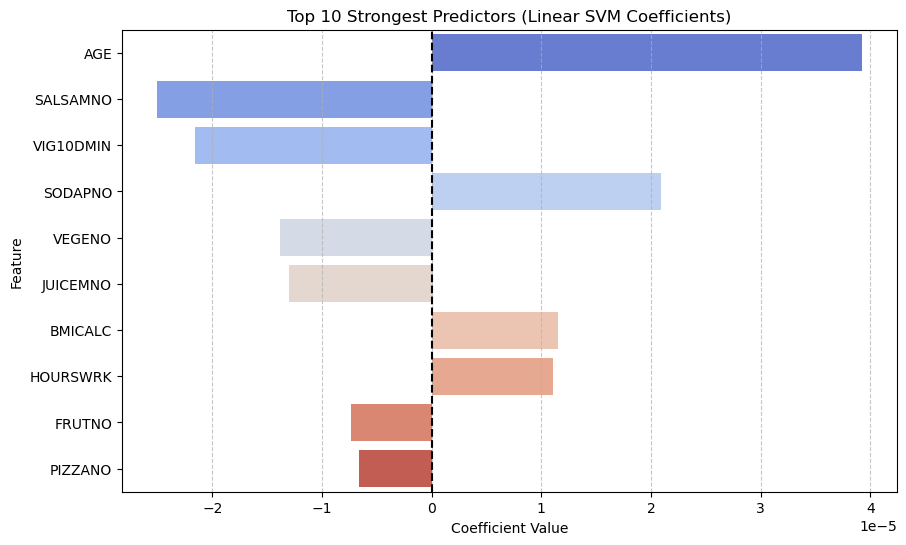

In [3]:
# Split into train and test
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tuning parameters :
param_grid_linear = {'C': [0.01, 0.1, 1, 10]}
param_grid_poly = {'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4]}
param_grid_rbf = {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 0.001, 0.01, 0.1, 1]}

# Linear SVM 
grid_linear = GridSearchCV(SVC(kernel='linear', random_state=12), param_grid_linear, cv=3)
grid_linear.fit(X_train, y_train)

# Polynomial SVM 
grid_poly = GridSearchCV(SVC(kernel='poly', random_state=12), param_grid_poly, cv=3)
grid_poly.fit(X_train, y_train)

# RBF SVM 
grid_rbf = GridSearchCV(SVC(kernel='rbf', random_state=21), param_grid_rbf, cv=3)
grid_rbf.fit(X_train, y_train)

# Best Models
best_linear = grid_linear.best_estimator_
best_poly = grid_poly.best_estimator_
best_rbf = grid_rbf.best_estimator_

# Predictions
y_pred_linear = best_linear.predict(X_test)
y_pred_poly = best_poly.predict(X_test)
y_pred_rbf = best_rbf.predict(X_test)

# Print best parameters
print("\nBest Parameters Found:")
print("Linear SVM:", grid_linear.best_params_)
print("Polynomial SVM:", grid_poly.best_params_)
print("RBF SVM:", grid_rbf.best_params_)

# Print accuracies
print("\nModel Accuracies:")
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Polynomial SVM Accuracy:", accuracy_score(y_test, y_pred_poly))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Classification reports
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_linear))

print("\nClassification Report (Polynomial SVM):")
print(classification_report(y_test, y_pred_poly))

print("\nClassification Report (RBF SVM):")
print(classification_report(y_test, y_pred_rbf))

# Confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Linear SVM Confusion Matrix (Tuned)')

plt.subplot(132)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Polynomial SVM Confusion Matrix (Tuned)')

plt.subplot(133)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('RBF SVM Confusion Matrix (Tuned)')

plt.tight_layout()
plt.show()


# Coefficients : Linear SVM
coefficients = best_linear.coef_.flatten()  
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients})

coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)
print("\nTop Features Based on Linear SVM Coefficients:")
print(coef_df_sorted)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coef_df_sorted.head(10), 
    palette='coolwarm')
plt.title('Top 10 Strongest Predictors (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


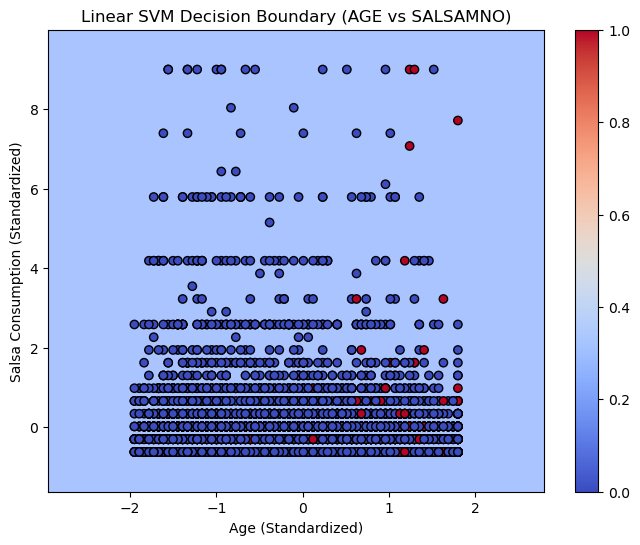

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


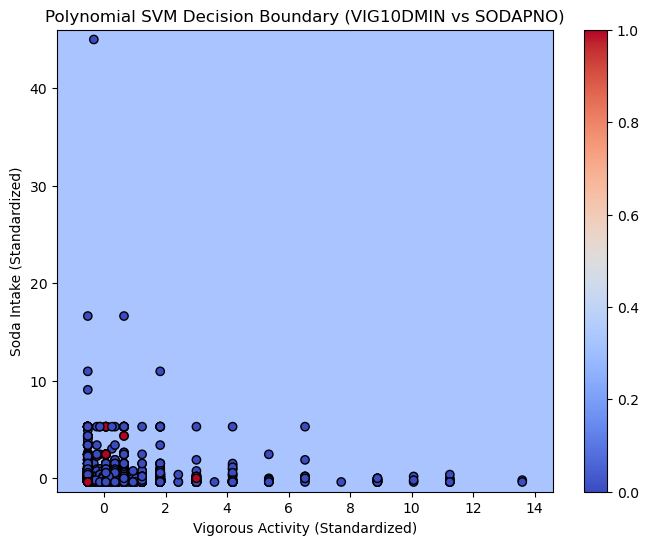

C:\Users\missi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


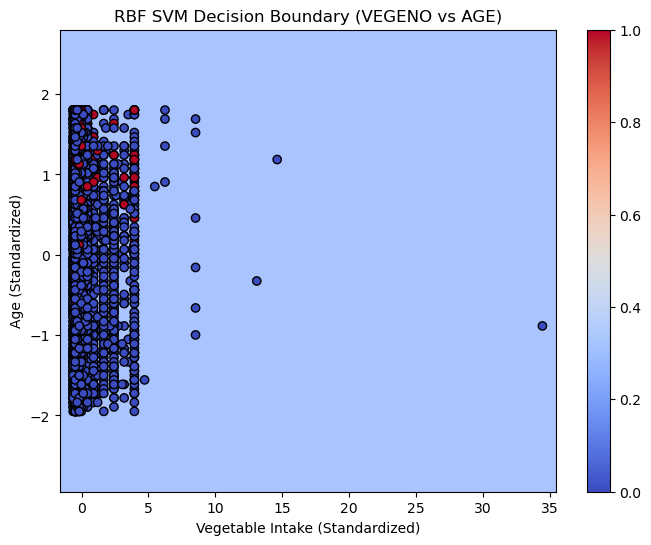

CPU times: total: 17.4 s
Wall time: 39min 5s


In [6]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Linear SVM (AGE vs SALSAMNO)
X_linear = X_train[['AGE', 'SALSAMNO']]  # already scaled
y_linear = y_train

param_grid_linear = {'C': [0.01, 0.1, 1]}
grid_linear = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid_linear, cv=3, n_jobs=-1)
grid_linear.fit(X_linear, y_linear)
best_linear = grid_linear.best_estimator_

# Create grid
x_min, x_max = X_linear['AGE'].min() - 1, X_linear['AGE'].max() + 1
y_min, y_max = X_linear['SALSAMNO'].min() - 1, X_linear['SALSAMNO'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))  # smaller grid
Z = best_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_linear['AGE'], X_linear['SALSAMNO'], c=y_linear, edgecolors='k', cmap='coolwarm')
plt.title('Linear SVM Decision Boundary (AGE vs SALSAMNO)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Salsa Consumption (Standardized)')
plt.colorbar()
plt.show()

# 2️⃣ Polynomial SVM (VIG10DMIN vs SODAPNO)
X_poly = X_train[['VIG10DMIN', 'SODAPNO']]  # already scaled
y_poly = y_train

param_grid_poly = {'C': [0.01, 0.1, 1], 'degree': [2, 3, 4]}
grid_poly = GridSearchCV(SVC(kernel='poly', random_state=42), param_grid_poly, cv=3, n_jobs=-1)
grid_poly.fit(X_poly, y_poly)
best_poly = grid_poly.best_estimator_

# Create grid
x_min, x_max = X_poly['VIG10DMIN'].min() - 1, X_poly['VIG10DMIN'].max() + 1
y_min, y_max = X_poly['SODAPNO'].min() - 1, X_poly['SODAPNO'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))  # smaller grid
Z = best_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_poly['VIG10DMIN'], X_poly['SODAPNO'], c=y_poly, edgecolors='k', cmap='coolwarm')
plt.title('Polynomial SVM Decision Boundary (VIG10DMIN vs SODAPNO)')
plt.xlabel('Vigorous Activity (Standardized)')
plt.ylabel('Soda Intake (Standardized)')
plt.colorbar()
plt.show()

# 3️⃣ RBF SVM (VEGENO vs AGE)
X_rbf = X_train[['VEGENO', 'AGE']]  # already scaled
y_rbf = y_train

param_grid_rbf = {'C': [0.01, 0.1, 1], 'gamma': ['scale', 0.001, 0.01, 0.1]}
grid_rbf = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid_rbf, cv=3, n_jobs=-1)
grid_rbf.fit(X_rbf, y_rbf)
best_rbf = grid_rbf.best_estimator_

# Create grid
x_min, x_max = X_rbf['VEGENO'].min() - 1, X_rbf['VEGENO'].max() + 1
y_min, y_max = X_rbf['AGE'].min() - 1, X_rbf['AGE'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))  # smaller grid
Z = best_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_rbf['VEGENO'], X_rbf['AGE'], c=y_rbf, edgecolors='k', cmap='coolwarm')
plt.title('RBF SVM Decision Boundary (VEGENO vs AGE)')
plt.xlabel('Vegetable Intake (Standardized)')
plt.ylabel('Age (Standardized)')
plt.colorbar()
plt.show()


C:\Users\missi\AppData\Local\Temp\ipykernel_20264\4275694590.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


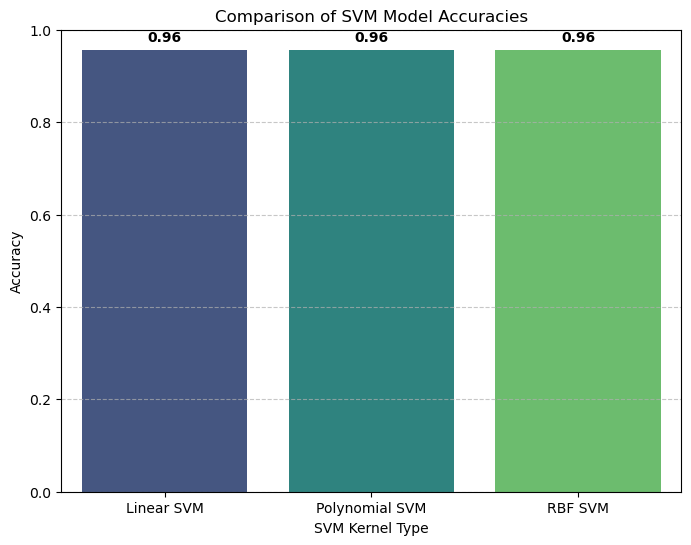

In [8]:

# Accuracies
linear_acc = accuracy_score(y_test, y_pred_linear)
poly_acc = accuracy_score(y_test, y_pred_poly)
rbf_acc = accuracy_score(y_test, y_pred_rbf)
accuracy_dict = {
    'Linear SVM': linear_acc,
    'Polynomial SVM': poly_acc,
    'RBF SVM': rbf_acc
}
plt.figure(figsize=(8,6))
sns.barplot(
    x=list(accuracy_dict.keys()),
    y=list(accuracy_dict.values()),
    palette='viridis'
)
plt.ylim(0, 1) 
plt.title('Comparison of SVM Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('SVM Kernel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(list(accuracy_dict.values())):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
